In [3]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy


In [4]:
with open('COVID-19 Testing Locations Symbolized by Test Type.csv') as testing_sites_df:
    testing_sites_df = pd.read_csv(testing_sites_df)
testing_sites_df.head()

,Name of Facility,Full Address,Municipality,Owner Name,Owner Type,Phone,Website,Operational Hours,Vehicle Capacity,Daily Testing Capacity,...,Vehicle Required,Facility Type,Minimum Age,Offering same-day diagnostic (not antibody) results,Offering Take-Home Test,Wheelchair accessibility,Accessibility Support,Status Color,x,y
0,Wheeling Hospital/WVU Hospitals Offsite COVID-...,"Wheeling Park (Near Ice Rink), 1801 National R...",Wheeling,Wheeling-Ohio Health Department,Municipal,1-800-423-1271,https://wheelinghospital.org/about/coronavirus...,10 am to 4 pm Monday to Saturday,NaN,NaN,...,NaN,Hospital,NaN,NaN,No,Don't know,NaN,#83C96E,-8979782.297,4874576.993
1,Middleton Family Medicine,"147 South Main Street Middleton, MA 01949",Middleton,Middleton Family Medicine,Other,978-774-2555,https://familymedicinemiddleton.com/,8am-5pm,NaN,NaN,...,NaN,Clinic/Health Center,0.0,NaN,No,Don't know,NaN,#83C96E,-7904519.958,5248669.198
2,Central Outreach Wellness Center,"127 Anderson Street, Suite 101 Timber Court Bu...",Pittsburgh,Central Outreach Wellness Center,Nonprofit,412.322.4151,https://www.centraloutreach.com/location/pitts...,Mon 9am-7pm; Tue 9am-5pm; Wed 9am-5pm; Thu 9am...,NaN,NaN,...,NaN,Outdoor/Tent,NaN,NaN,No,Don't know,NaN,#FF6600,-8905649.968,4931349.163
3,Anthony Wayne Recreation Area,"Palisades Int Interstate Parkway, Exit 17, Bea...",Bear Mountain,NaN,State/Territory,1-888-364-3065,https://parks.ny.gov/parks/26/details.aspx,7 a.m. to 7 p.m. daily,NaN,NaN,...,NaN,NaN,NaN,NaN,No,Don't know,NaN,#83C96E,-8240722.529,5056547.051
4,Wexford Health + Wellness Pavilion (Allegheny ...,"12311 Perry Highway Wexford, PA 15090",Wexford,Allegheny Heath Network,Private,412.362.8677,https://www.ahn.org/location-detail?name=Wexfo...,8 a.m. until 5 p.m. daily,NaN,NaN,...,NaN,Clinic/Health Center,NaN,NaN,No,Don't know,NaN,#83C96E,-8912678.464,4958745.420


In [5]:
testing_sites_df.drop(columns = ['Owner Name','Phone','Website','Operational Hours','Vehicle Capacity','CreationDate','Drive-through','Appointment Only','Referral Required','Call first','Virtual/Telehealth Screening','Local Health Department URL','Vehicle Required','Offering same-day diagnostic (not antibody) results','Offering Take-Home Test','Status Color'], inplace = True)
testing_sites_df.drop(columns = ['Public Form Submission','Minimum Age','Wheelchair accessibility ','Accessibility Support'], inplace = True)

In [6]:
testing_sites_df.head()

,Name of Facility,Full Address,Municipality,Owner Type,Daily Testing Capacity,Services Offered,State or Territory,County,Testing Start Date,Testing End Date,Kind of test,Processing location,Facility Type,x,y
0,Wheeling Hospital/WVU Hospitals Offsite COVID-...,"Wheeling Park (Near Ice Rink), 1801 National R...",Wheeling,Municipal,NaN,COVID-19 testing only (no screening),West Virginia,Ohio,NaN,NaN,Molecular,Lab (location not specified),Hospital,-8979782.297,4874576.993
1,Middleton Family Medicine,"147 South Main Street Middleton, MA 01949",Middleton,Other,NaN,COVID-19 testing only (no screening),Massachusetts,Essex,NaN,NaN,Molecular,Lab (location not specified),Clinic/Health Center,-7904519.958,5248669.198
2,Central Outreach Wellness Center,"127 Anderson Street, Suite 101 Timber Court Bu...",Pittsburgh,Nonprofit,NaN,COVID-19 screening and testing,Pennsylvania,Allegheny,NaN,NaN,Molecular,Lab (location not specified),Outdoor/Tent,-8905649.968,4931349.163
3,Anthony Wayne Recreation Area,"Palisades Int Interstate Parkway, Exit 17, Bea...",Bear Mountain,State/Territory,NaN,COVID-19 testing only (no screening),New York,Orange,NaN,NaN,Molecular,Lab (location not specified),NaN,-8240722.529,5056547.051
4,Wexford Health + Wellness Pavilion (Allegheny ...,"12311 Perry Highway Wexford, PA 15090",Wexford,Private,NaN,COVID-19 testing only (no screening),Pennsylvania,Allegheny,NaN,NaN,Molecular,Lab (location not specified),Clinic/Health Center,-8912678.464,4958745.420


In [7]:
Covid_data = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/live/us-counties.csv")

In [8]:
Covid_data

,date,county,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
0,2020-12-16,Autauga,Alabama,1001.0,3510,43.0,3113.0,38.0,397.0,5.0
1,2020-12-16,Baldwin,Alabama,1003.0,11212,145.0,8682.0,109.0,2530.0,36.0
2,2020-12-16,Barbour,Alabama,1005.0,1296,30.0,814.0,26.0,482.0,4.0
3,2020-12-16,Bibb,Alabama,1007.0,1520,42.0,1327.0,25.0,193.0,17.0
4,2020-12-16,Blount,Alabama,1009.0,3950,50.0,2947.0,48.0,1003.0,2.0
...,...,...,...,...,...,...,...,...,...,...
3242,2020-12-16,Sweetwater,Wyoming,56037.0,2544,15.0,2431.0,NaN,113.0,NaN
3243,2020-12-16,Teton,Wyoming,56039.0,1940,2.0,1885.0,NaN,55.0,NaN
3244,2020-12-16,Uinta,Wyoming,56041.0,1352,7.0,1116.0,NaN,236.0,NaN
3245,2020-12-16,Washakie,Wyoming,56043.0,658,11.0,517.0,NaN,141.0,NaN


In [9]:
Covid_data.describe()

,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
count,3218.000000,3247.000000,3169.000000,2401.000000,1877.000000,1835.000000,1153.000000
mean,31471.421069,5194.908531,96.539602,4930.110787,118.885456,520.798910,18.222897
std,16368.839603,18628.048095,539.380616,17750.723257,593.323299,2279.531898,149.718010
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19035.500000,557.500000,8.000000,493.000000,8.000000,39.000000,1.000000
50%,30026.000000,1345.000000,22.000000,1225.000000,25.000000,135.000000,2.000000
75%,46118.500000,3514.000000,57.000000,3363.000000,66.000000,396.500000,9.000000
max,78030.000000,543949.000000,24578.000000,543769.000000,19844.000000,69120.000000,4734.000000


In [11]:
with open('waqi-covid19-airqualitydata-2020.csv') as AQI:
    AQI = pd.read_csv(AQI)
AQI.head()


FileNotFoundError: [Errno 2] No such file or directory: 'waqi-covid19-airqualitydata-2020.csv'

In [ ]:
AQI.columns

In [ ]:
AQI_US = AQI.loc[AQI['Country'] == 'US']
AQI_US

In [ ]:
pd.unique(AQI_US['Specie'])

In [ ]:
#lists of countries and cities
print('countries', pd.unique(AQI['Country']))
print('cities', pd.unique(AQI['City']))

In [15]:
histAQI = pd.read_excel('airqualitytrendsbycity1990-2019.xlsx')
histAQI.head()

,CBSA,Core Based Statistical Area,Pollutant,Trend Statistic,Number of Trend Sites,1990,1991,1992,1993,1994,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,10100,"Aberdeen, SD",PM2.5,Weighted Annual Mean,1.0,NaN,NaN,NaN,NaN,NaN,...,8.700,7.100,7.500,7.300,6.20,6.200,5.40,5.800,6.600,5.900
1,10100,NaN,PM2.5,98th Percentile,1.0,NaN,NaN,NaN,NaN,NaN,...,27.000,18.000,23.000,22.000,17.00,14.000,14.00,13.000,22.000,18.000
2,10420,"Akron, OH",CO,2nd Max,1.0,5.70,3.300,4.100,3.100,5.300,...,1.400,1.000,1.100,0.800,0.80,1.000,1.10,0.900,1.800,1.800
3,10420,NaN,O3,4th Max,2.0,0.09,0.101,0.087,0.093,0.086,...,0.074,0.073,0.072,0.059,0.06,0.065,0.06,0.066,0.068,0.062
4,10420,NaN,PM2.5,Weighted Annual Mean,3.0,NaN,NaN,NaN,NaN,NaN,...,12.400,11.100,10.000,9.700,9.90,10.400,8.20,7.900,7.900,8.200


In [16]:
cities = histAQI['Core Based Statistical Area']
y = [str(i).split() for i in cities]

states = []
for i in y:
    state = i[-1]
    states.append(state)
histAQI['StateAbbr'] = states

In [45]:
histAQI.shape

(892, 36)

In [ ]:
# histAQI.isnull().all()
histAQI_Year_column = pd.melt(histAQI, id_vars=(['Pollutant']), value_vars=([1990,
                                1991,                          1992,
                                1993,                          1994,
                                1995,                          1996,
                                1997,                          1998,
                                1999,                          2000,
                                2001,                          2002,
                                2003,                          2004,
                                2005,                          2006,
                                2007,                          2008,
                                2009,                          2010,
                                2011,                          2012,
                                2013,                          2014,
                                2015,                          2016,
                                2017,                          2018,
                                2019]), var_name='Year', value_name='Pollutant Value').dropna()
histAQI_Year_column.head()

In [12]:
with open('500_Cities__Current_asthma_among_adults_aged___18_years.csv') as asthma:
    asthma = pd.read_csv(asthma)
asthma.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,GA,Georgia,Columbus,Census Tract,BRFSS,Health Outcomes,1319000-13215010302,Current asthma among adults aged >=18 Years,%,...,8.8,NaN,NaN,6293,"(32.5420961469, -84.975715442)",HLTHOUT,CASTHMA,1319000.0,1.321501e+10,Current Asthma
1,2017,GA,Georgia,Johns Creek,City,BRFSS,Health Outcomes,1342425,Current asthma among adults aged >=18 Years,%,...,7.3,NaN,NaN,76728,"(34.0332991998, -84.2027195506)",HLTHOUT,CASTHMA,1342425.0,NaN,Current Asthma
2,2017,GA,Georgia,Sandy Springs,Census Tract,BRFSS,Health Outcomes,1368516-13121010119,Current asthma among adults aged >=18 Years,%,...,10.3,NaN,NaN,4938,"(33.9913040108, -84.3452326148)",HLTHOUT,CASTHMA,1368516.0,1.312101e+10,Current Asthma
3,2017,GA,Georgia,Roswell,Census Tract,BRFSS,Health Outcomes,1367284-13121011423,Current asthma among adults aged >=18 Years,%,...,7.9,NaN,NaN,4852,"(34.0177367078, -84.3840157981)",HLTHOUT,CASTHMA,1367284.0,1.312101e+10,Current Asthma
4,2017,GA,Georgia,Savannah,Census Tract,BRFSS,Health Outcomes,1369000-13051002300,Current asthma among adults aged >=18 Years,%,...,12.8,NaN,NaN,2056,"(32.0577200508, -81.1112836355)",HLTHOUT,CASTHMA,1369000.0,1.305100e+10,Current Asthma


In [13]:
asthma.drop(columns = ['Category','UniqueID','Measure','Short_Question_Text','Data_Value_Footnote','CategoryID','MeasureId','CityFIPS','TractFIPS'], inplace = True)
asthma.columns

Index(['Year', 'StateAbbr', 'StateDesc', 'CityName', 'GeographicLevel',
       'DataSource', 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type',
       'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Data_Value_Footnote_Symbol', 'PopulationCount', 'GeoLocation'],
      dtype='object')

In [64]:
histAQI_asthma = histAQI.append(asthma)

#histAQI_asthma = pd.merge(asthma,histAQI,
    #how="left",                      
    #left_on = ['StateAbbr'],
    #right_on = ['StateAbbr'])                        
#histAQI_asthma
histAQI_asthma

,CBSA,Core Based Statistical Area,Pollutant,Trend Statistic,Number of Trend Sites,1990,1991,1992,1993,1994,...,DataSource,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Footnote_Symbol,PopulationCount,GeoLocation
0,10100,"Aberdeen, SD",PM2.5,Weighted Annual Mean,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10100,NaN,PM2.5,98th Percentile,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10420,"Akron, OH",CO,2nd Max,1.0,5.70,3.300,4.100,3.100,5.300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10420,NaN,O3,4th Max,2.0,0.09,0.101,0.087,0.093,0.086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10420,NaN,PM2.5,Weighted Annual Mean,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BRFSS,%,CrdPrv,Crude prevalence,8.7,8.2,9.2,NaN,4638.0,"(41.1792673506, -104.838572685)"
29002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BRFSS,%,CrdPrv,Crude prevalence,10.9,10.2,11.8,NaN,415.0,"(41.1209013739, -104.773243747)"
29003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BRFSS,%,CrdPrv,Crude prevalence,8.9,8.4,9.5,NaN,1517.0,"(42.9956670639, -88.1930406365)"
29004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BRFSS,%,CrdPrv,Crude prevalence,10.0,9.6,10.4,NaN,1378.0,"(42.6903362003, -87.8246370427)"


In [69]:
histAQI_asthma= histAQI_asthma[histAQI_asthma.StateAbbr != 'US']

In [70]:
histAQI_Year_column = pd.melt(histAQI, id_vars=(['Pollutant']), value_vars=([1990,
                                1991,                          1992,
                                1993,                          1994,
                                1995,                          1996,
                                1997,                          1998,
                                1999,                          2000,
                                2001,                          2002,
                                2003,                          2004,
                                2005,                          2006,
                                2007,                          2008,
                                2009,                          2010,
                                2011,                          2012,
                                2013,                          2014,
                                2015,                          2016,
                                2017,                          2018,
                                2019]), var_name='Year', value_name='Pollutant Value').dropna()
histAQI_Year_column.head()

,Pollutant,Year,Pollutant Value
2,CO,1990,5.700
3,O3,1990,0.090
6,SO2,1990,161.000
9,O3,1990,0.086
12,CO,1990,5.100


In [ ]:
countries = ["USA", "CHN", "JPN", "IND", "BRA"]
df_country = df_years[df_years["Country Code"].isin(countries)].drop(["Country Code"], axis=1).T.reset_index()
df_country.columns = ["Year"] + list(df_country.iloc[0][1:])
df_country = df_country[1:]
ax = df_country.plot.line(x="Year")
ax.set_title("The US and China lead GDP Growth")
ax.set_xlabel("Year")
_ = ax.set_ylabel("GDP - ten trillions (USD)")

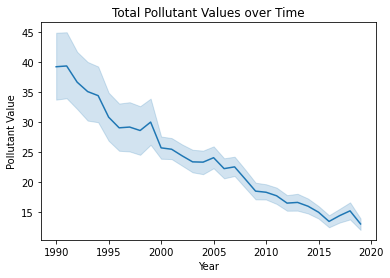

In [84]:
sns.lineplot(x = "Year", y = "Pollutant Value", data = histAQI_Year_column)
plt.title('Total Pollutant Values over Time')
plt.show()

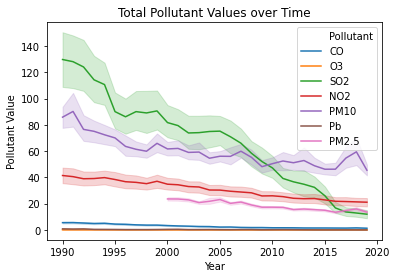

In [83]:
sns.lineplot(x = "Year", y = "Pollutant Value", data = histAQI_Year_column, hue = "Pollutant")
plt.title('Pollutant Values over Time')
plt.show()

In [20]:
demographics_data = pd.read_csv("https://data.cdc.gov/resource/vbim-akqf.csv")

In [ ]:
demographics_data
